In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [ ]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X ,y = make_blobs(n_samples=1000, centers=centers, random_state=40) #X.iloc[:,-2:].values, y
#transformation = [[0.4, 0.2], [-0.4, 1.2]]
#X = np.dot(X, transformation)

(-12.5, 7.0)

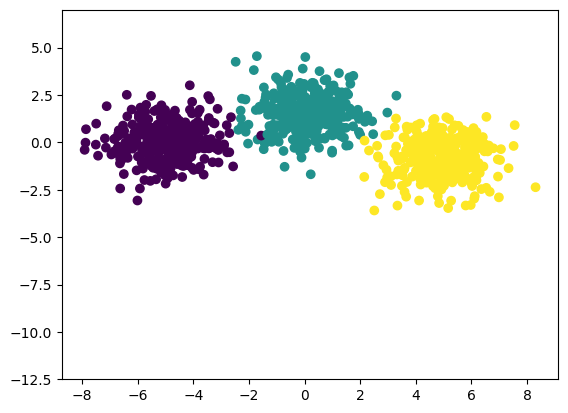

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.ylim(-12.5, 7)

In [ ]:
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()

In [ ]:
clf1.fit(X, y==0)
clf2.fit(X, y==1)
clf3.fit(X, y==2)

LogisticRegression()

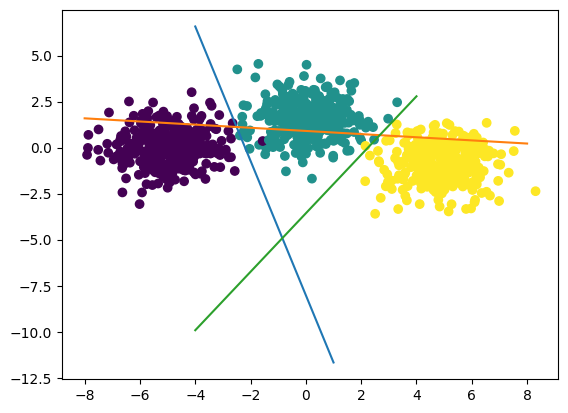

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([-4, 1], [-(clf1.intercept_+clf1.coef_[0][0]*(-4))/clf1.coef_[0][1], -(clf1.intercept_+clf1.coef_[0][0]*(1))/clf1.coef_[0][1]])
plt.plot([-8, 8], [-(clf2.intercept_+clf2.coef_[0][0]*(-8))/clf2.coef_[0][1], -(clf2.intercept_+clf2.coef_[0][0]*(8))/clf2.coef_[0][1]])
plt.plot([-4, 4], [-(clf3.intercept_+clf3.coef_[0][0]*(-4))/clf3.coef_[0][1], -(clf3.intercept_+clf3.coef_[0][0]*(4))/clf3.coef_[0][1]])

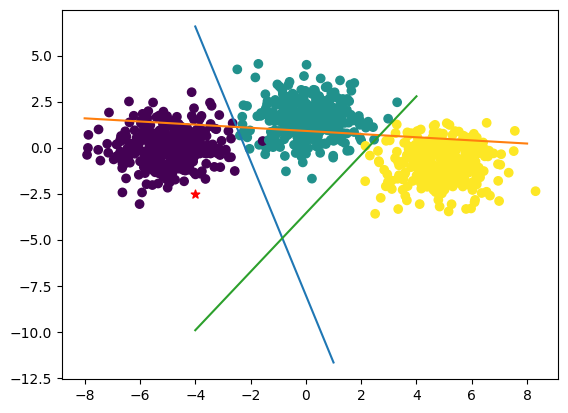

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([-4, 1], [-(clf1.intercept_+clf1.coef_[0][0]*(-4))/clf1.coef_[0][1], -(clf1.intercept_+clf1.coef_[0][0]*(1))/clf1.coef_[0][1]])
plt.plot([-8, 8], [-(clf2.intercept_+clf2.coef_[0][0]*(-8))/clf2.coef_[0][1], -(clf2.intercept_+clf2.coef_[0][0]*(8))/clf2.coef_[0][1]])
plt.plot([-4, 4], [-(clf3.intercept_+clf3.coef_[0][0]*(-4))/clf3.coef_[0][1], -(clf3.intercept_+clf3.coef_[0][0]*(4))/clf3.coef_[0][1]])
plt.scatter([-4], [-2.5], s=40, c='r', marker='*')

In [ ]:
clf1.predict_proba(np.array([[-4,-2.5]]))[0,1], clf2.predict_proba(np.array([[-4,-2.5]]))[0,1], clf3.predict_proba(np.array([[-4,-2.5]]))[0,1]

(0.9996171379545671, 0.0003794516265315677, 2.0742586734682065e-06)

In [ ]:
clf1 = LogisticRegression()
clf2 = LogisticRegression()
clf3 = LogisticRegression()

In [ ]:
clf1.fit(X[(y==0) | (y==1),:], y[(y==0) | (y==1)]==0)
clf2.fit(X[(y==0) | (y==2), :], y[(y==0) | (y==2)]==0)
clf3.fit(X[(y==1) | (y==2), :], y[(y==1) | (y==2)]==1)

LogisticRegression()

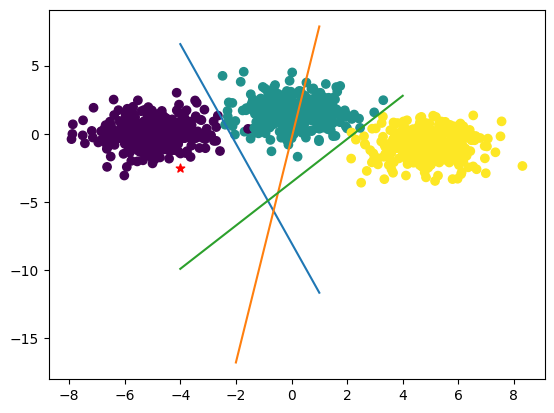

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([-4, 1], [-(clf1.intercept_+clf1.coef_[0][0]*(-4))/clf1.coef_[0][1], -(clf1.intercept_+clf1.coef_[0][0]*(1))/clf1.coef_[0][1]])
plt.plot([-2, 1], [-(clf2.intercept_+clf2.coef_[0][0]*(-2))/clf2.coef_[0][1], -(clf2.intercept_+clf2.coef_[0][0]*(1))/clf2.coef_[0][1]])
plt.plot([-4, 4], [-(clf3.intercept_+clf3.coef_[0][0]*(-4))/clf3.coef_[0][1], -(clf3.intercept_+clf3.coef_[0][0]*(4))/clf3.coef_[0][1]])
plt.scatter([-4], [-2.5], s=40, c='r', marker='*')

In [ ]:
clf1.predict(np.array([[-4,-2.5]])), clf2.predict(np.array([[-4,-2.5]])), clf3.predict(np.array([[-4,-2.5]]))

(array([ True]), array([ True]), array([ True]))

$$
\begin{pmatrix}
* & 0 & 0\\
0 & * & 1\\
0 & 1 & *
\end{pmatrix}
$$

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
clf = LogisticRegression(multi_class='ovr') #{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

In [ ]:
clf.fit(X,y)

LogisticRegression(multi_class='ovr')

<Axes: >

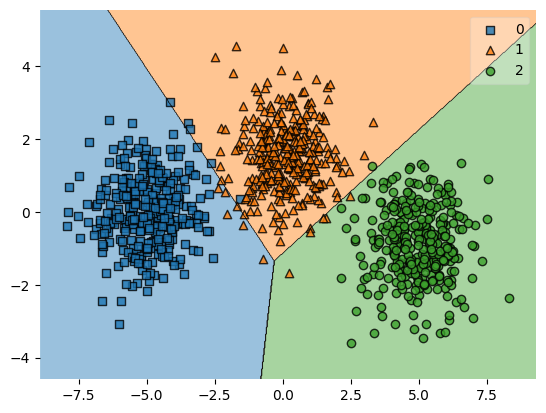

In [ ]:
plot_decision_regions(X,y,clf)

#Written digit recognition

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
# Load the Digits dataset
digits = load_digits()

# The dataset is now stored in the 'digits' variable
X = digits.data  # The feature matrix containing the pixel values of the digits
y = digits.target  # The target labels (the actual digits being represented)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(1203, 64)

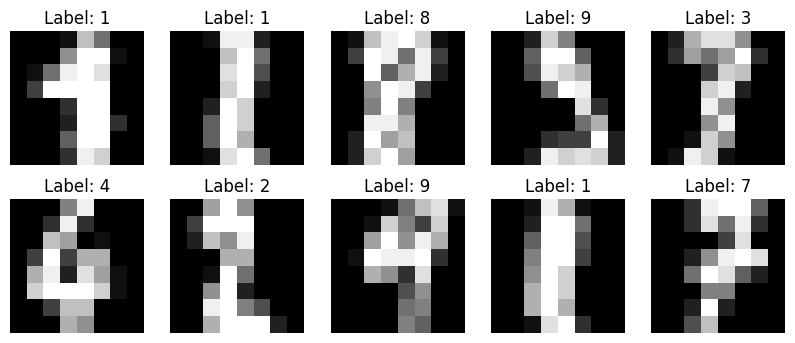

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Plot each image with its corresponding label
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(8,8), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

# Show the plot
plt.show()

In [ ]:
clf_digits = LogisticRegression(solver='newton-cg')

In [ ]:
clf_digits.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, clf_digits.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



In [ ]:
clf_digits.predict(X_test[0].reshape(1,-1))

array([6])

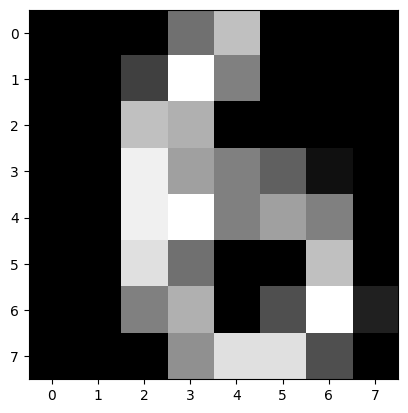

In [ ]:
plt.imshow(X_test[0,:].reshape(8,8), cmap='gray')

In [ ]:
len(clf_digits.coef_)

10

In [ ]:
len(clf_digits.coef_[0])

64